In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
train=pd.read_csv('train.csv')
train_df=pd.read_csv('train.csv')

In [68]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


0    50140
1     4668
Name: is_promoted, dtype: int64


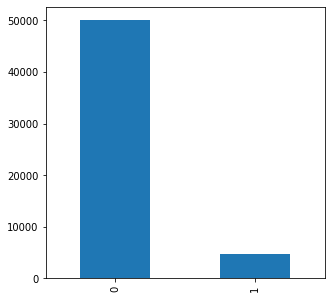

In [6]:
print(train['is_promoted'].value_counts())
train['is_promoted'].value_counts().plot(kind='bar',figsize=(5,5))


### The Dataset is imbalanced

In [7]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [8]:
categorical_columns=['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating',
                   'age','KPIs_met >80%','awards_won?']

continuous_column=['avg_training_score']

Target=['is_promoted']


### Quantifying missing data on full data

Text(0.5, 1.0, 'Quantifying missing data')

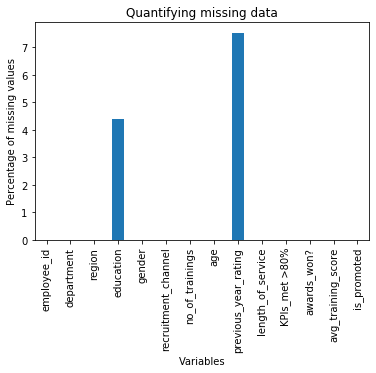

In [9]:
((train.isnull().sum()/train.shape[0])*100).plot(kind='bar')
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [10]:
train_promoted=train[train['is_promoted']==1]
train_not_promoted=train[train['is_promoted']==0]

employee_id               0
department                0
region                    0
education               122
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    339
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64


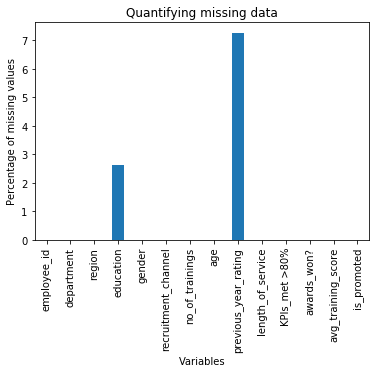

In [11]:
((train_promoted.isnull().sum()/train_promoted.shape[0])*100).plot(kind='bar')
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
print(train_promoted.isnull().sum())

employee_id                0
department                 0
region                     0
education               2287
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3785
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


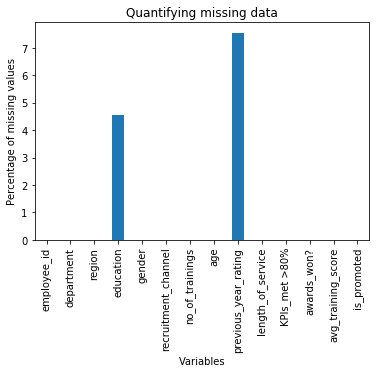

In [12]:
((train_not_promoted.isnull().sum()/train_not_promoted.shape[0])*100).plot(kind='bar')
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
print(train_not_promoted.isnull().sum())

In [13]:
train.describe(include=np.number)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
train.describe(include=np.object)

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [74]:
train[['department','region','education','gender','recruitment_channel']].head()

,department,region,education,gender,recruitment_channel
0,7,31,2,0,2
1,4,14,0,1,0
2,7,10,0,1,2
3,7,15,0,1,0
4,8,18,0,1,0


In [21]:
## conversion of object type categories to numeric values

In [73]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
for col in ['department','region','education','gender','recruitment_channel']:
    train[col]=lbl.fit_transform(train[col])   

In [24]:
#### Imputation of missing Values

In [72]:
train['education']=train['education'].bfill()
train['previous_year_rating']=train['previous_year_rating'].ffill()

In [75]:
from scipy.stats import iqr
for col in train.columns:
    print("The standard deviation of",format(col),train[col].std())
    print("The skewness of",format(col),train[col].skew())
    print("The Minimum of",format(col),train[col].min())
    print("The IQR of",format(col),iqr(train[col]))
    print("The Maximun of",format(col),train[col].max())
    print('*'*50)
    print('*'*50)
        

The standard deviation of employee_id 22586.581449144964
The skewness of employee_id -0.0031279471733061466
The Minimum of employee_id 1
The IQR of employee_id 39060.75
The Maximun of employee_id 78298
**************************************************
**************************************************
The standard deviation of department 2.506045525727157
The skewness of department -0.6489006032392042
The Minimum of department 0
The IQR of department 3.0
The Maximun of department 8
**************************************************
**************************************************
The standard deviation of region 8.764953552082043
The skewness of region 0.44793802508843716
The Minimum of region 0
The IQR of region 10.0
The Maximun of region 33
**************************************************
**************************************************
The standard deviation of education 0.9021047118096824
The skewness of education 0.9080917903069788
The Minimum of education 0
The IQR of educ

### checking distribution of data with variuos ways

In [90]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab
from scipy.stats import kstest, norm
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import jarque_bera

In [ ]:
##Kolmogorov Smirnov test

In [62]:
train=np.reshape(np.array(train),(1,-1))
ks_statistic, p_value = kstest(train,'norm')
if(p_value>0.05):
    print("Data is Gaussian Distributed")
else:
    print("Data is Not Gaussian distributed")

Data is Not Gaussian distributed


In [ ]:
##Shapiro Wilk test

In [63]:
stat,p_value=shapiro(train)
if(p_value>0.05):
    print("Data is Gaussian Distributed")
else:
     print("Data is Not Gaussian distributed")
    

Data is Not Gaussian distributed


In [ ]:
##D’Agostino’s K-squared test

In [79]:
stat,p_value=normaltest(train)
if(p_value>0.05).all():
    print("Data is Gaussian Distributed")
else:
     print("Data is Not Gaussian distributed")
    

Data is Not Gaussian distributed


In [ ]:
##jarque_bera test

In [83]:
stat,p_value=jarque_bera(train)
if(p_value>0.05):
    print("Data is Gaussian Distributed")
else:
     print("Data is Not Gaussian distributed")
    

Data is Not Gaussian distributed


In [95]:
### Q-Q Plot

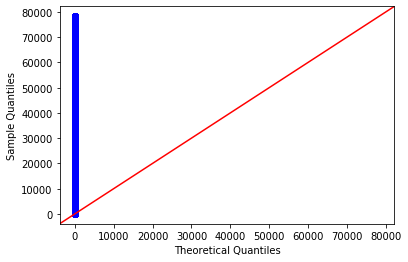

Data is Not Gaussian distributed 


In [96]:
sm.qqplot(train_df,line='45')
pylab.show()
print("Data is Not Gaussian distributed ")

In [4]:
train_df['education']=train_df['education'].bfill()
train_df['previous_year_rating']=train_df['previous_year_rating'].ffill()

In [169]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
for col in ['department','region','education','gender','recruitment_channel']:
    train_df[col]=lbl.fit_transform(train_df[col]) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d9eee0da0>,
      dtype=object)

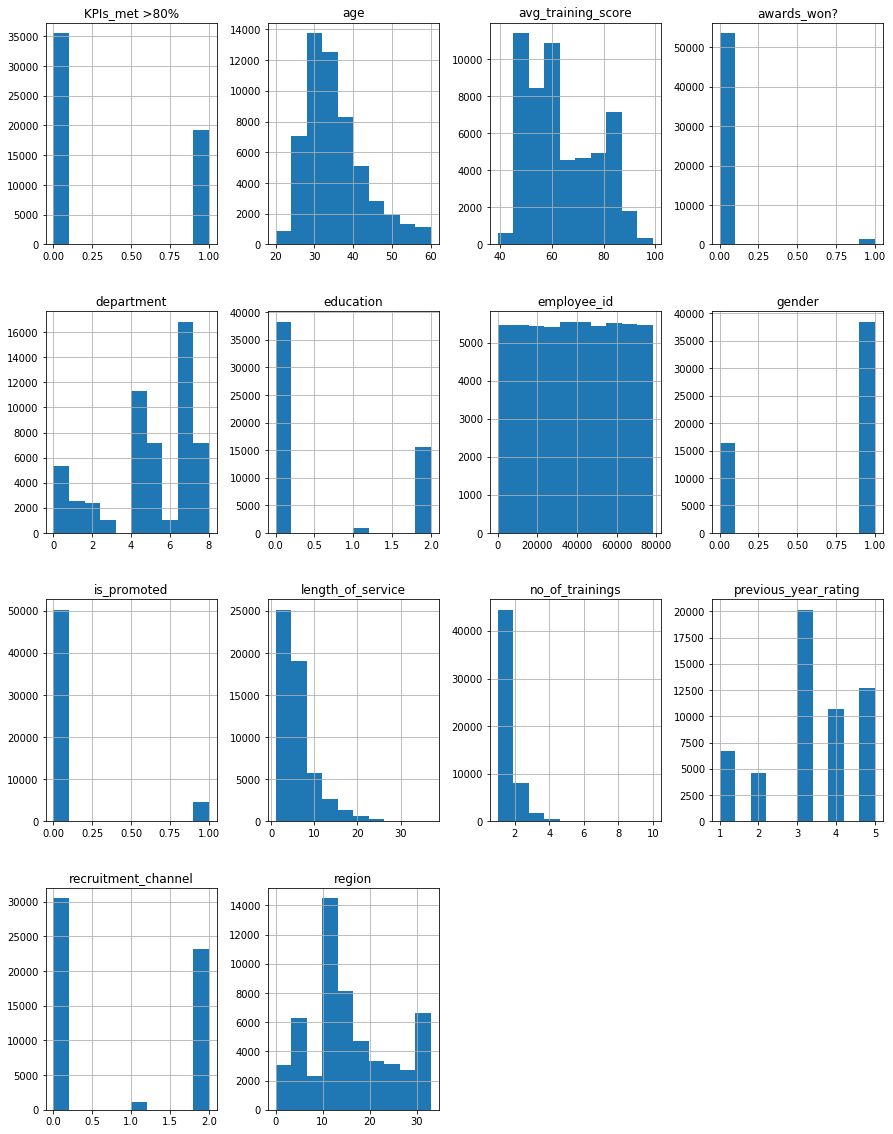

In [107]:
pd.plotting.hist_frame(train_df, figsize=(15,20))

In [3]:
categorical_columns=['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating',
                   'age','KPIs_met >80%','awards_won?']

continuous_column=['avg_training_score']

Target=['is_promoted']

In [ ]:
## Distribution of varibales in terms of Histogram and Boxplot

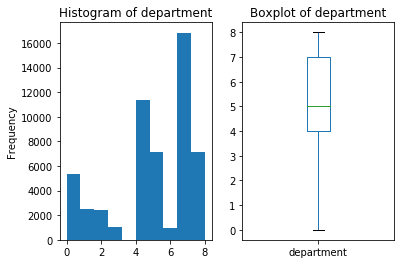

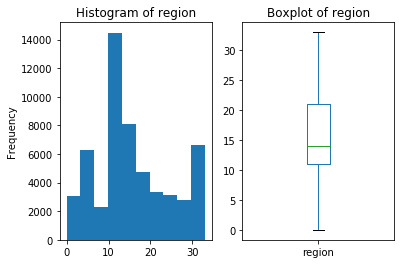

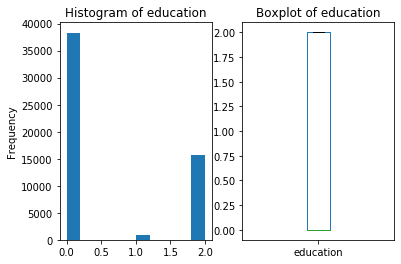

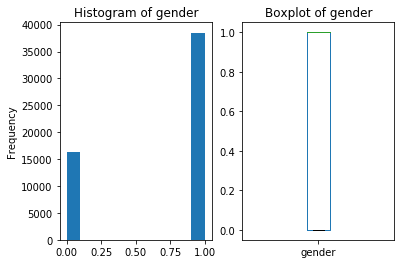

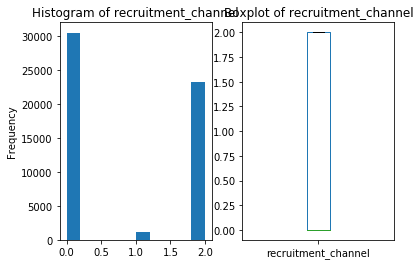

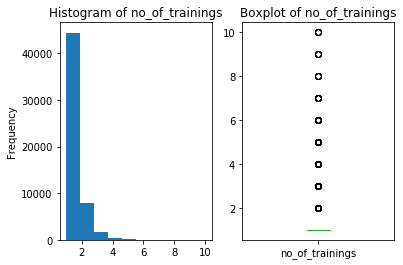

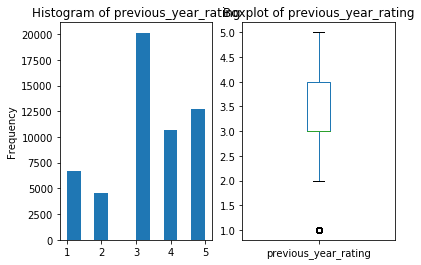

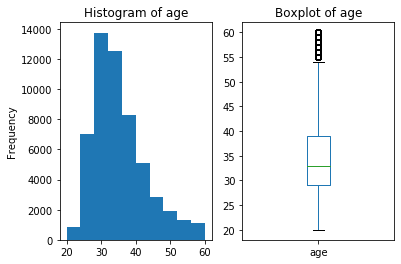

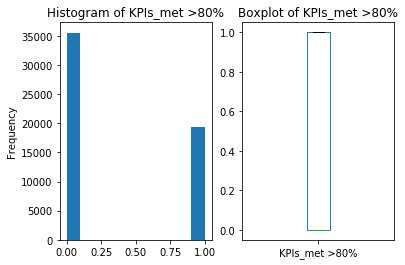

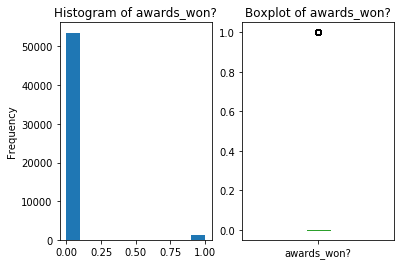

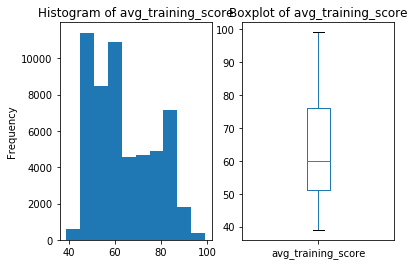

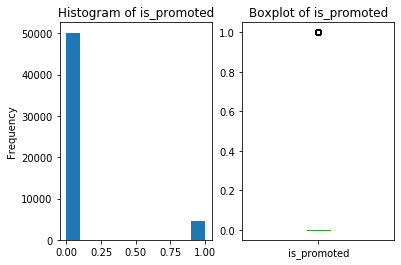

In [25]:
for col in ['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating',
        'age','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']:
    f,(ax1,ax2)=plt.subplots(1,2)
    train_df[col].plot(kind='hist', ax=ax1)
    train_df[col].plot(kind='box', ax=ax2)
    ax1.set_title('Histogram of '+str(col))
    ax2.set_title('Boxplot of '+str(col))
    
    
    

In [ ]:
## ploting of categorical columns

In [123]:
Not_promoted_df=train_df[train_df['is_promoted']==0]
promoted_df=train_df[train_df['is_promoted']==1]

In [23]:
GroupedData=train_df.groupby(['is_promoted']).mean()
GroupedData

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,,,,,,,
0,39187.520423,4.972696,15.405325,0.579697,0.703929,0.867491,1.257639,34.844037,3.273036,5.879398,0.319685,0.014180,62.647686
1,39285.092331,4.973865,15.682948,0.660026,0.685733,0.875321,1.203299,34.372965,3.932734,5.716367,0.698800,0.119751,71.325193


1. The avg of avg_training score is more in terms of promoted employes than not promotes employess also the awards won,KPI_met is high in terms of promoted employess though  dataset is imabalanced.

2. in terms of promoted employess avg of education score/items is higher than not promoted employess . 

3. in terms of Gender male employees are more in not promoted category than promoted.

4. no_of_trainings and age are probably equally distributed and provided eaually to both the category (not_promoted/promoted)

5. length_of_service avg score is merely high for not prormoted employees than promoted employess but our dataset is imbalanced

6. As we can observe no such biassness from recruitment_channel avg score 

7. previous_year_rating avg score is more in terms of Promoted employess and Not prormoted employess

8. in terms of eduction specfic education mattered probably most in terms of promotion.

9. Region wise with education  probably has an slight impact in terms of promotion


In [167]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [121]:
train_df=train_df.rename(columns={'KPIs_met >80%':'KPI','awards_won?':'awards_won'})

### Density countour plot

Text(0.5, 0.98, 'Density plot of promoted/Notpromoted empoyees with respect to no_of_trainings')

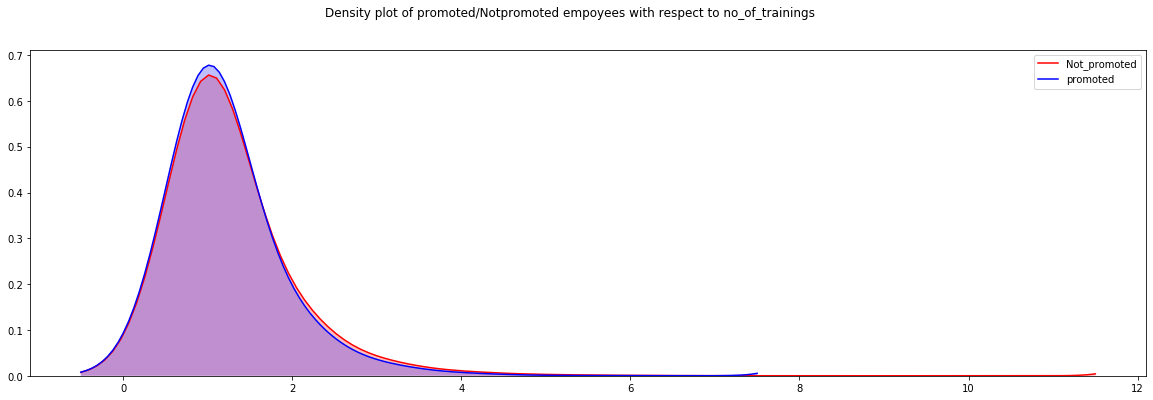

In [137]:
fig,ax=plt.subplots(figsize=(20,6))
sns.kdeplot(Not_promoted_df.no_of_trainings,shade=True, color="r",bw=0.5)
kde_plot = sns.kdeplot(promoted_df.no_of_trainings,shade=True, color="b",bw=0.5)
kde_plot.legend(labels=['Not_promoted', 'promoted'])
fig.suptitle("Density plot of promoted/Notpromoted empoyees with respect to no_of_trainings")

Text(0.5, 0.98, 'Density plot of promoted/Notpromoted empoyees with respect to age')

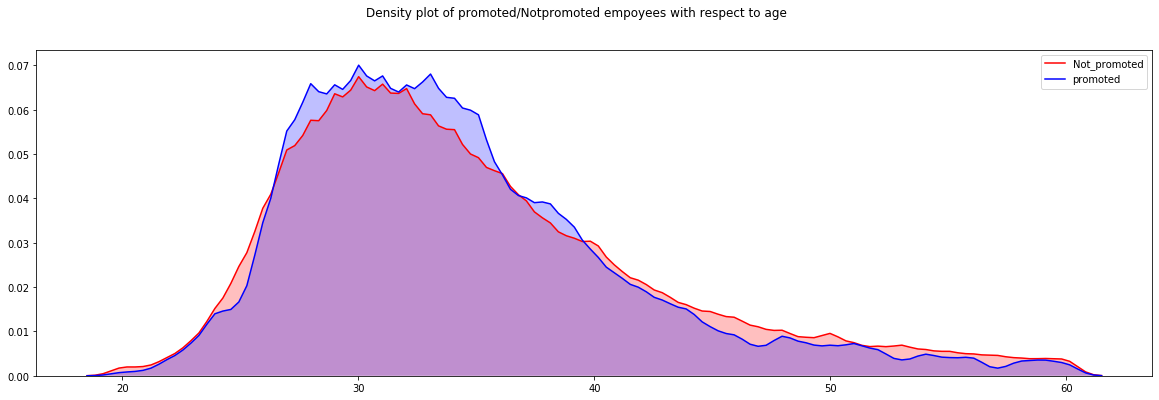

In [136]:
fig,ax=plt.subplots(figsize=(20,6))
sns.kdeplot(Not_promoted_df.age,shade=True, color="r",bw=0.5)
kde_plot = sns.kdeplot(promoted_df.age,shade=True, color="b",bw=0.5)
kde_plot.legend(labels=['Not_promoted', 'promoted'])
fig.suptitle("Density plot of promoted/Notpromoted empoyees with respect to age")


Text(0.5, 0.98, 'Density plot of promoted/Notpromoted empoyees with respect to previous_year_rating')

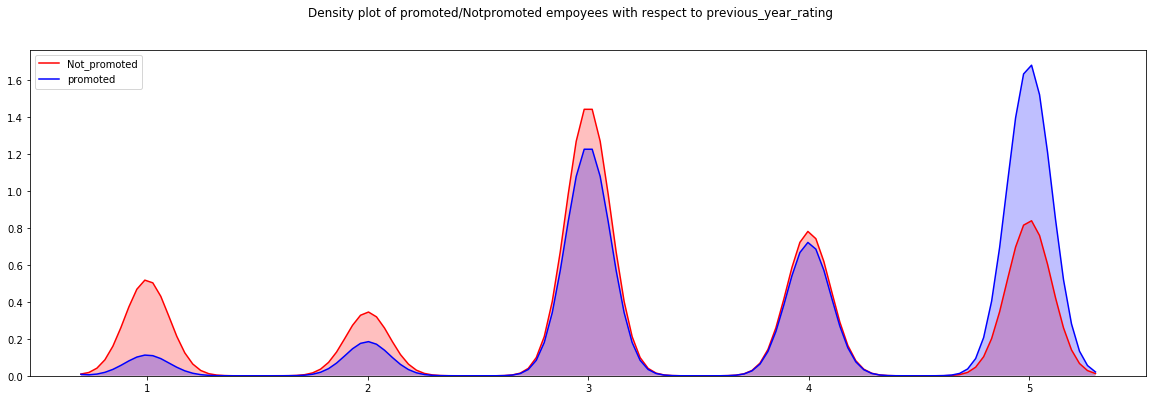

In [112]:
fig,ax=plt.subplots(figsize=(20,6))
sns.kdeplot(Not_promoted_df.previous_year_rating,shade=True, color="r",bw=0.1)
kde_plot = sns.kdeplot(promoted_df.previous_year_rating,shade=True, color="b",bw=0.1)
kde_plot.legend(labels=['Not_promoted', 'promoted'])
fig.suptitle("Density plot of promoted/Notpromoted empoyees with respect to previous_year_rating")

Text(0.5, 0.98, 'Density plot of promoted/Notpromoted empoyees with respect to length_of_service')

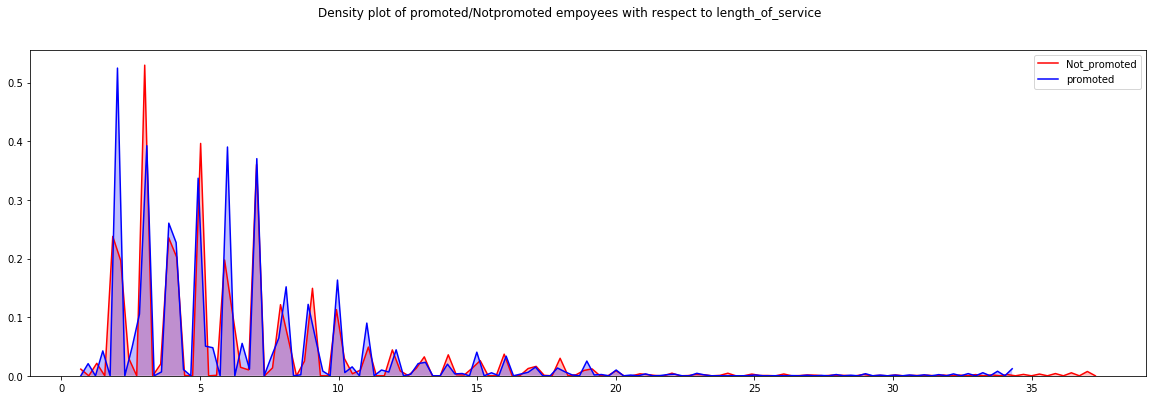

In [113]:
fig,ax=plt.subplots(figsize=(20,6))
sns.kdeplot(Not_promoted_df.length_of_service,shade=True, color="r",bw=0.1)
kde_plot = sns.kdeplot(promoted_df.length_of_service,shade=True, color="b",bw=0.1)
kde_plot.legend(labels=['Not_promoted', 'promoted'])
fig.suptitle("Density plot of promoted/Notpromoted empoyees with respect to length_of_service")

Text(0.5, 0.98, 'Density plot of promoted/Notpromoted empoyees with respect to KPIs_met >80%')

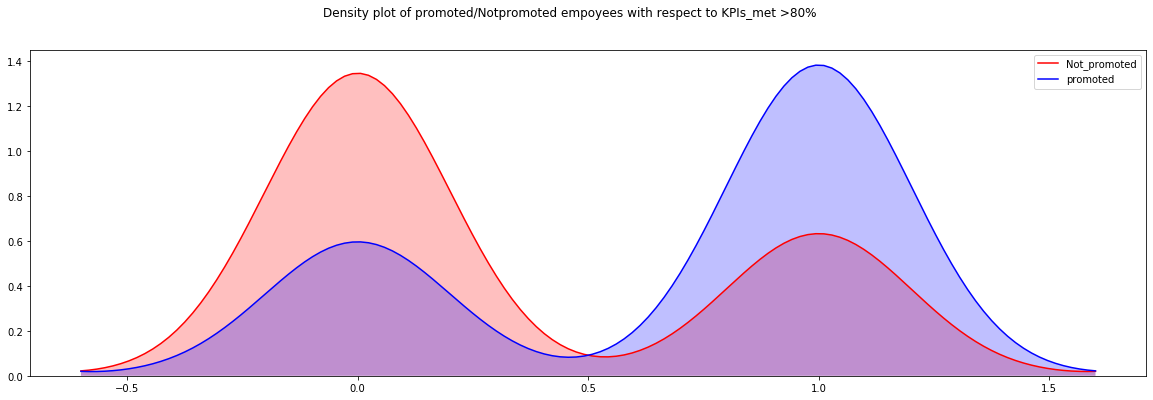

In [135]:
fig,ax=plt.subplots(figsize=(20,6))
sns.kdeplot(Not_promoted_df.KPI,shade=True, color="r",bw=0.2)
kde_plot = sns.kdeplot(promoted_df.KPI,shade=True, color="b",bw=0.2)
kde_plot.legend(labels=['Not_promoted', 'promoted'])
fig.suptitle("Density plot of promoted/Notpromoted empoyees with respect to KPIs_met >80%")

Text(0.5, 0.98, 'Density plot of promoted/Notpromoted empoyees with respect to awards_won?')

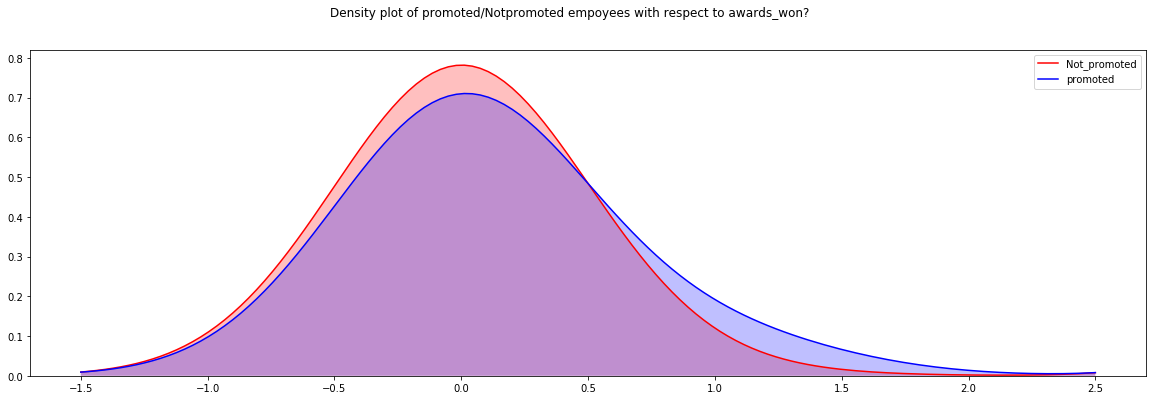

In [133]:
fig,ax=plt.subplots(figsize=(20,6))
sns.kdeplot(Not_promoted_df.awards_won,shade=True, color="r",bw=0.5)
kde_plot = sns.kdeplot(promoted_df.awards_won,shade=True, color="b",bw=0.5)
kde_plot.legend(labels=['Not_promoted', 'promoted'])
fig.suptitle("Density plot of promoted/Notpromoted empoyees with respect to awards_won?")

Text(0.5, 0.98, 'Density plot of promoted/Notpromoted empoyees with respect to avg_training_score')

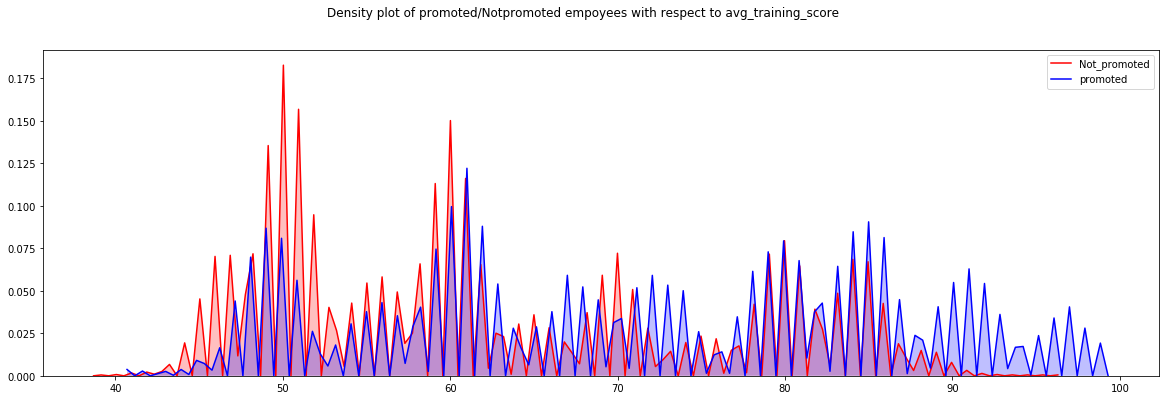

In [116]:
fig,ax=plt.subplots(figsize=(20,6))
sns.kdeplot(Not_promoted_df.avg_training_score,shade=True, color="r",bw=0.1)
kde_plot = sns.kdeplot(promoted_df.avg_training_score,shade=True, color="b",bw=0.1)
kde_plot.legend(labels=['Not_promoted', 'promoted'])
fig.suptitle("Density plot of promoted/Notpromoted empoyees with respect to avg_training_score")

1. in terms of no of trainings the Not promoted employess got more no of trainings but keeping in mind the dataset is imbalanced over here.
2. there is such significant change can be visualised in terms of age in non_promoted or promoted employess.
3. in terms of previous year rating no of promoted employess got significant rise in rating '5'.
4. with in the 2 to 5 years of service the no of non promoted employess is more than promoted employess,most number of promoted employess are scattered with in 7 to 33 years.
   And No promoted employess served after than 35 years.
5. in terms of KPI there is marginal changes as the mean score of KPI of promoted employess is slightly higher than non promoted employess.
6. in awards won promoted no of empoyess got slightly more no of awards with respect to non promoted employess.
7. in avg_training_score between 42 to 60 non promoted employees got maximum no of score still did not got promotion but avg score of training is more for promoted employess than non promoted employess.

In [185]:
### Some other Visualisation 

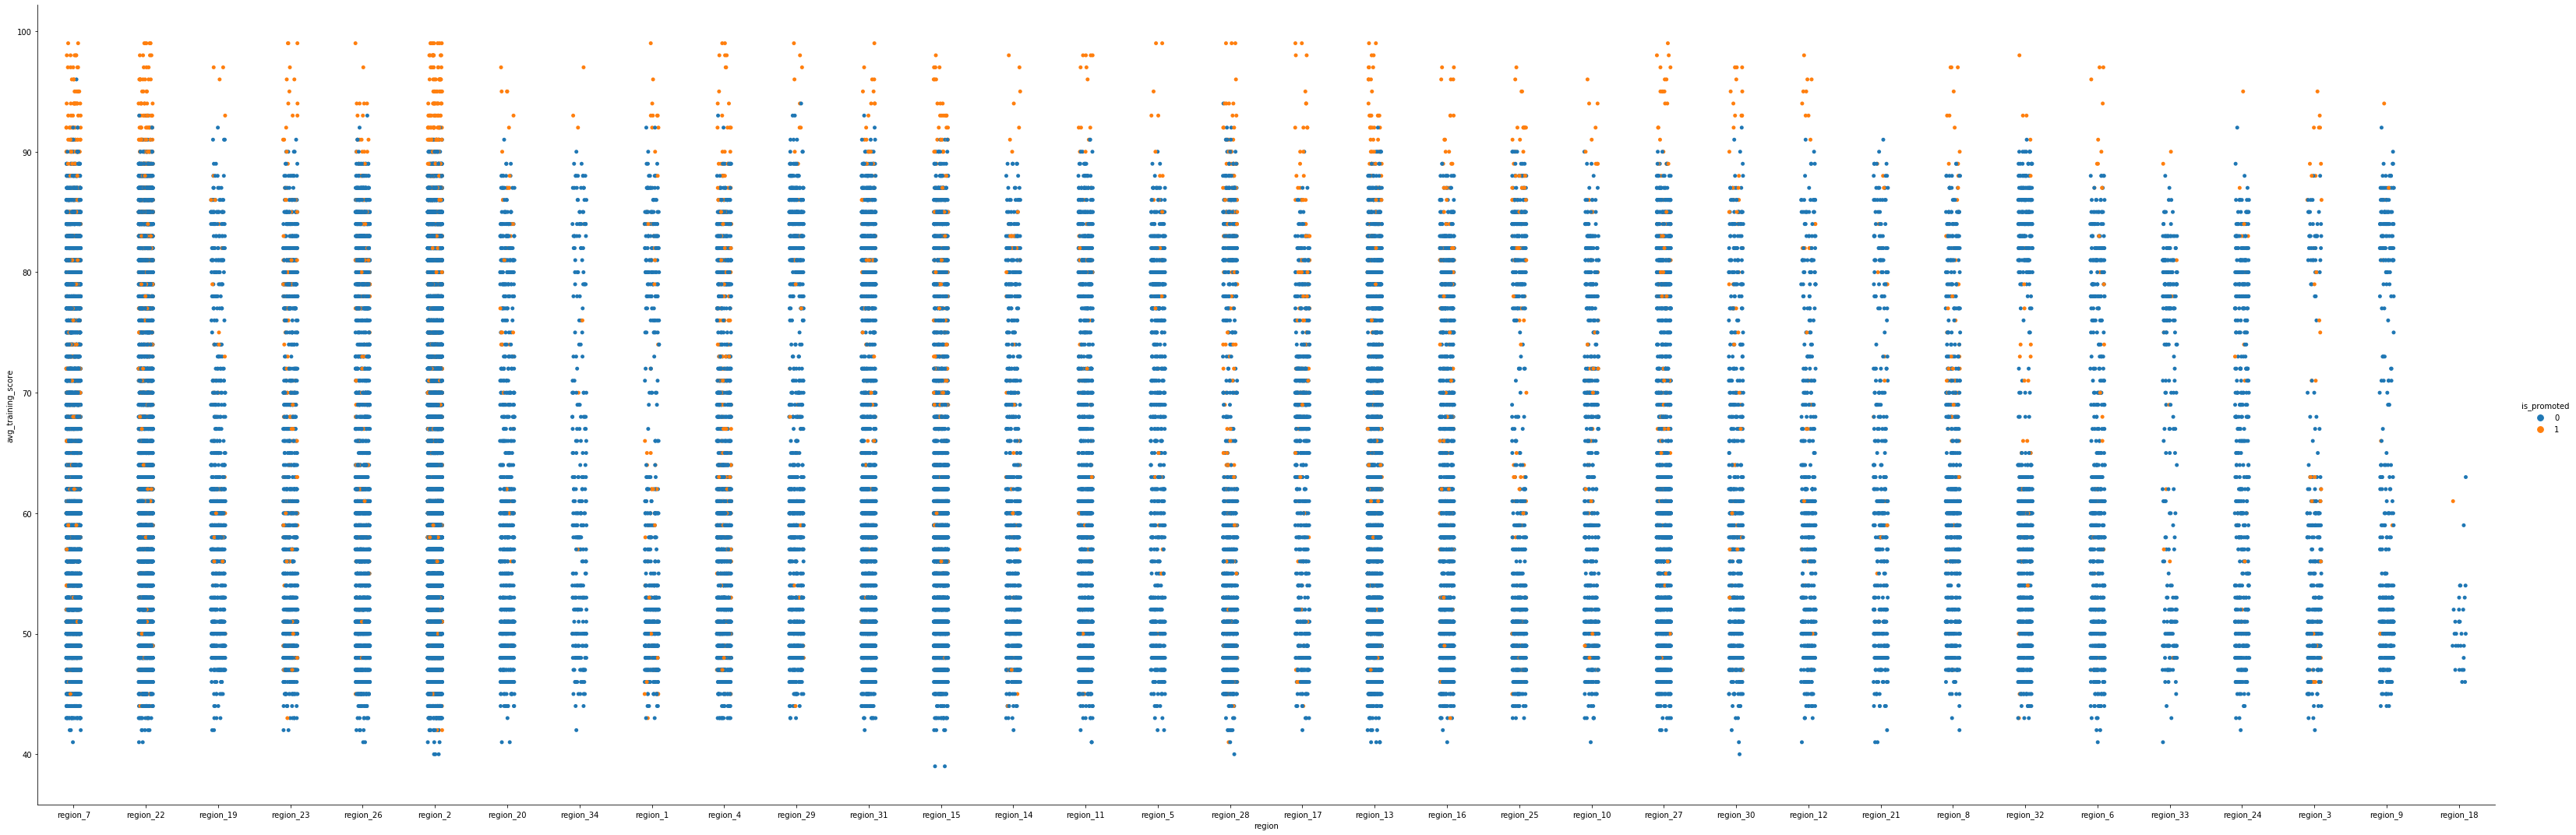

In [215]:
sns.catplot(x='region',y='avg_training_score',hue='is_promoted',data=train_df,height=15, aspect=3.0)

In [ ]:
region 7,2,13,27 has the most score of avg training score of promoted employees region 33 & 21 has low avg training score.region 3 has low nof of observation in terms of avg training score

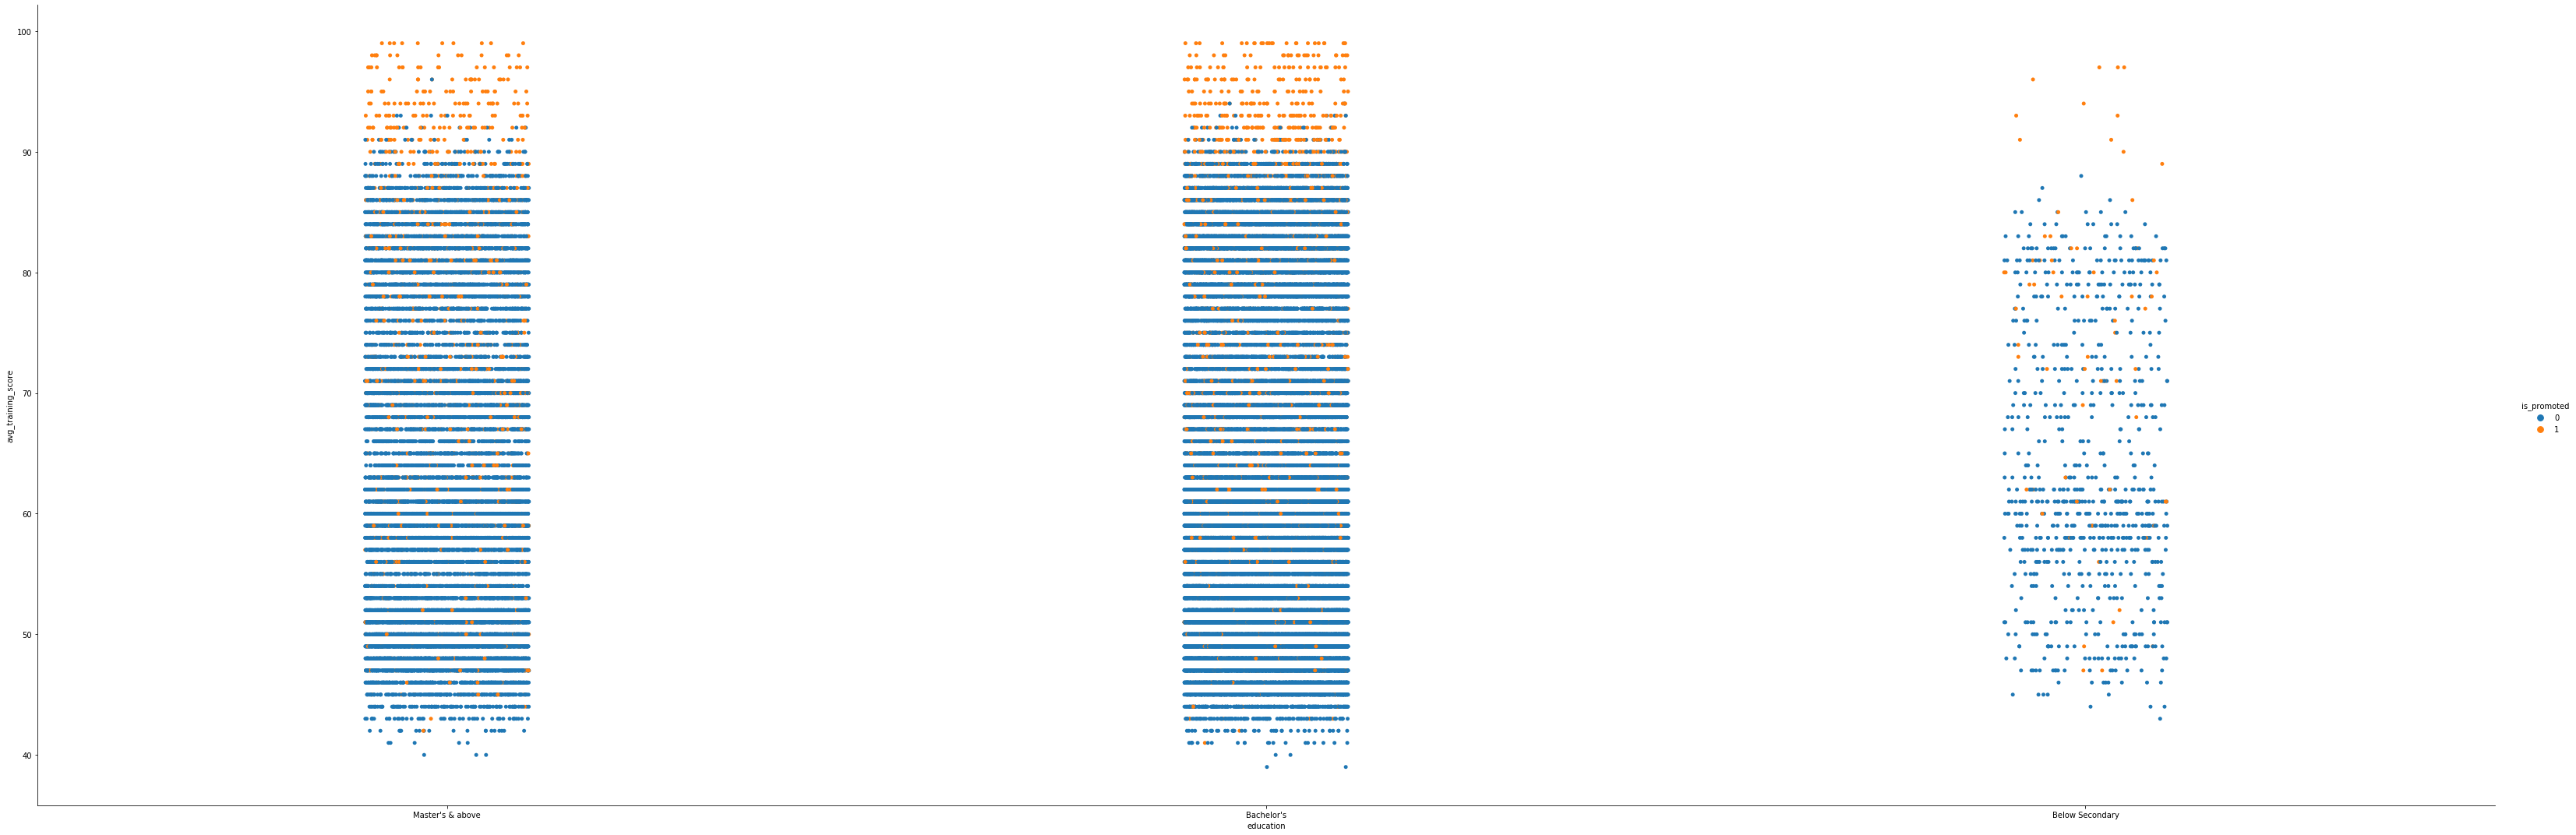

In [221]:
sns.catplot(x='education',y='avg_training_score',hue='is_promoted',data=train_df,height=15, aspect=3.0)

In [ ]:
in terms of all category in Education variable ,promoted employees are scoring more though with less samples ,Below secondary category has least no of samples

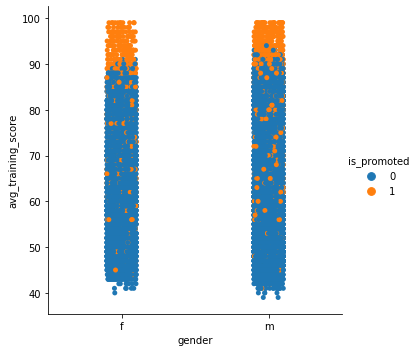

In [232]:
sns.catplot(x='gender',y='avg_training_score',hue='is_promoted', data=train_df)

In [ ]:
##Male employees got more promotion than female employees

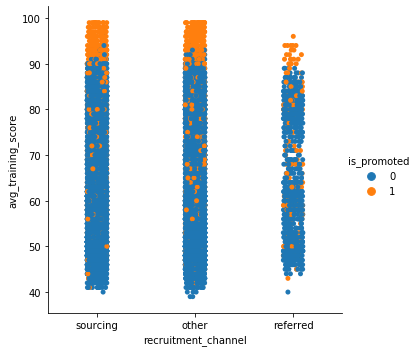

In [233]:
sns.catplot(x='recruitment_channel',y='avg_training_score',hue='is_promoted', data=train_df)

In [ ]:
##  reffered recruitment channel has least observations , as in other channel recruited employees got promotion

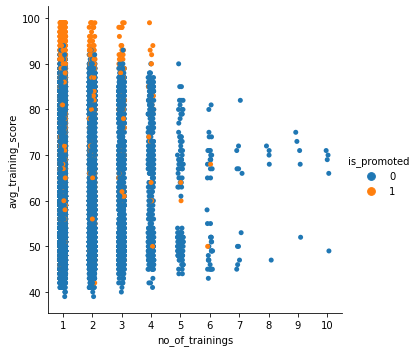

In [234]:
sns.catplot(x='no_of_trainings',y='avg_training_score',hue='is_promoted', data=train_df)

In [ ]:
## promoted employees got no of trainings with in the range of 1,2,3 mostly

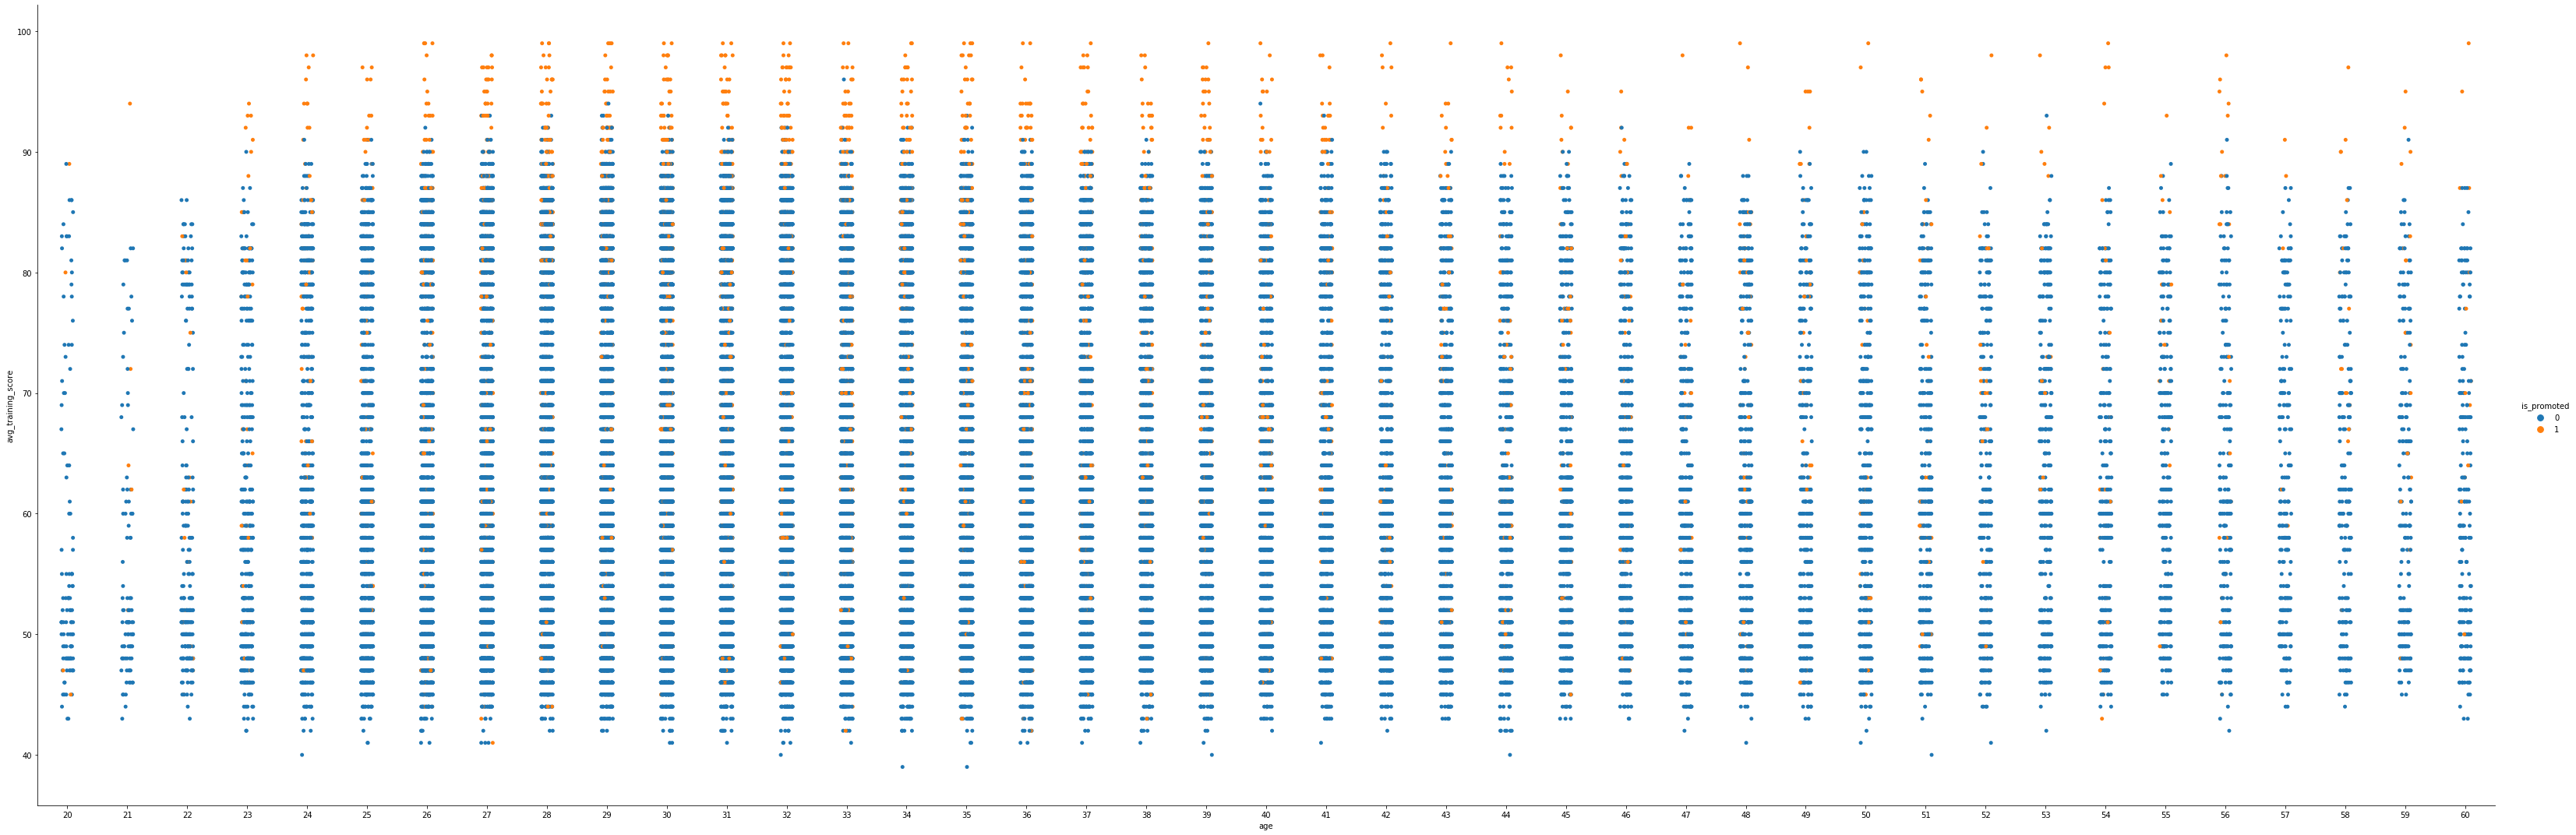

In [236]:
sns.catplot(x='age',y='avg_training_score',hue='is_promoted', data=train_df,height=15, aspect=3.0)

In [ ]:
## Most no of promoted employees are in the range of age between 24 and 42 .promoted employees are less in the range of age between 20 to 22 & 50 to 60

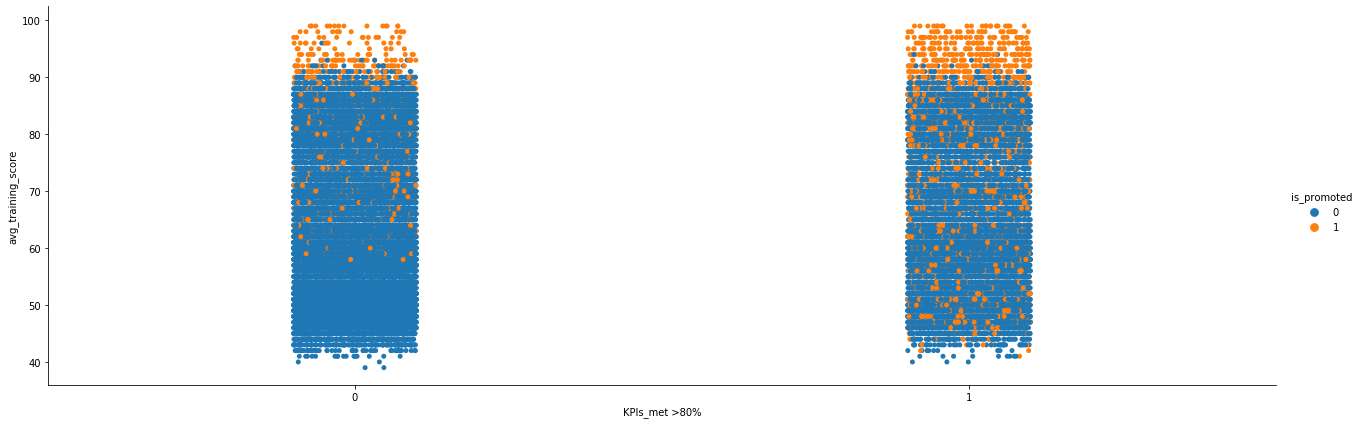

In [6]:
sns.catplot(x='KPIs_met >80%',y='avg_training_score',hue='is_promoted', data=train_df,height=6, aspect=3.0)

In [ ]:
### Most of promoted employees met kpi and their avg score of training is more

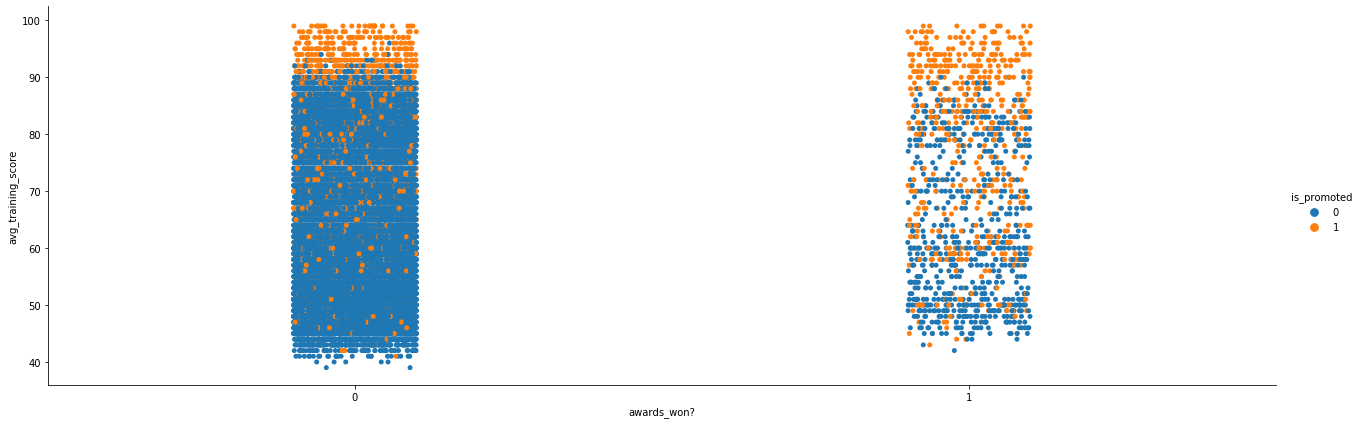

In [7]:
sns.catplot(x='awards_won?',y='avg_training_score',hue='is_promoted', data=train_df,height=6, aspect=3.0)

In [8]:
### Most of Promoted employees won the award


1. region 7,2,13,27 has the most score of avg training score of promoted employees region 33 & 21 has low avg training score.region 3 has low nof of observation in terms of avg training score.
2. Most of Promoted employees won the award.
3. Most of promoted employees met kpi and their avg score of training is more.
4. Most no of promoted employees are in the range of age between 24 and 42 .promoted employees are less in the range of age between 20 to 22 & 50 to 60.
5. promoted employees got no of trainings with in the range of 1,2,3 mostly.
6. reffered recruitment channel has least observations , as in other channel recruited employees got promotion.
7. Male employees got more promotion than female employees.
8. in terms of all category in Education variable ,promoted employees are scoring more though with less samples ,Below secondary category has least no of samples







In [10]:
categorical_columns=['department','region','education','gender','recruitment_channel','no_of_trainings',
                   'age','KPIs_met >80%','awards_won?']

continuous_column=['avg_training_score','previous_year_rating']

Target=['is_promoted']

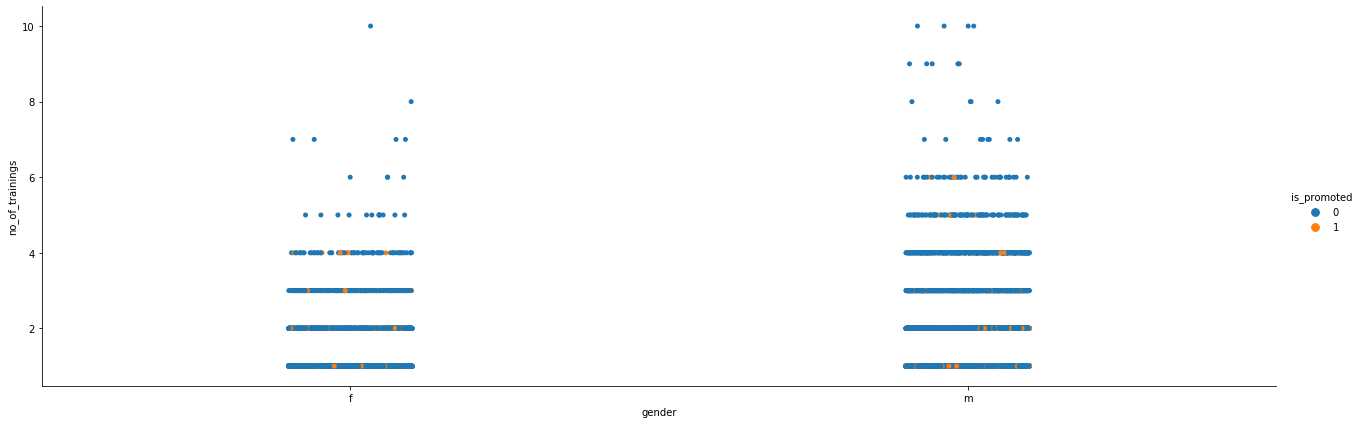

In [11]:
sns.catplot(x='gender',y='no_of_trainings',hue='is_promoted', data=train_df,height=6, aspect=3.0)

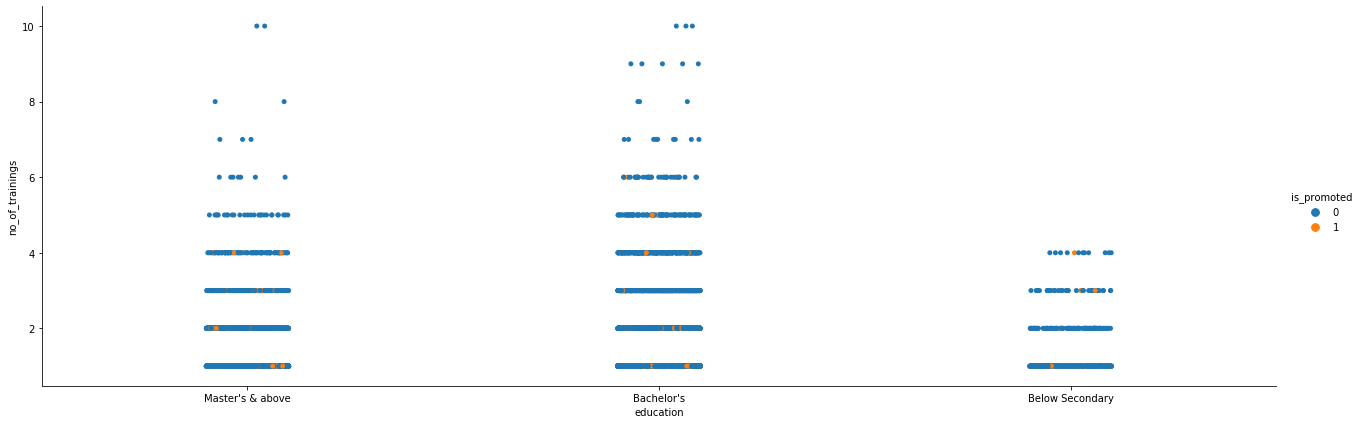

In [12]:
sns.catplot(x='education',y='no_of_trainings',hue='is_promoted', data=train_df,height=6, aspect=3.0)

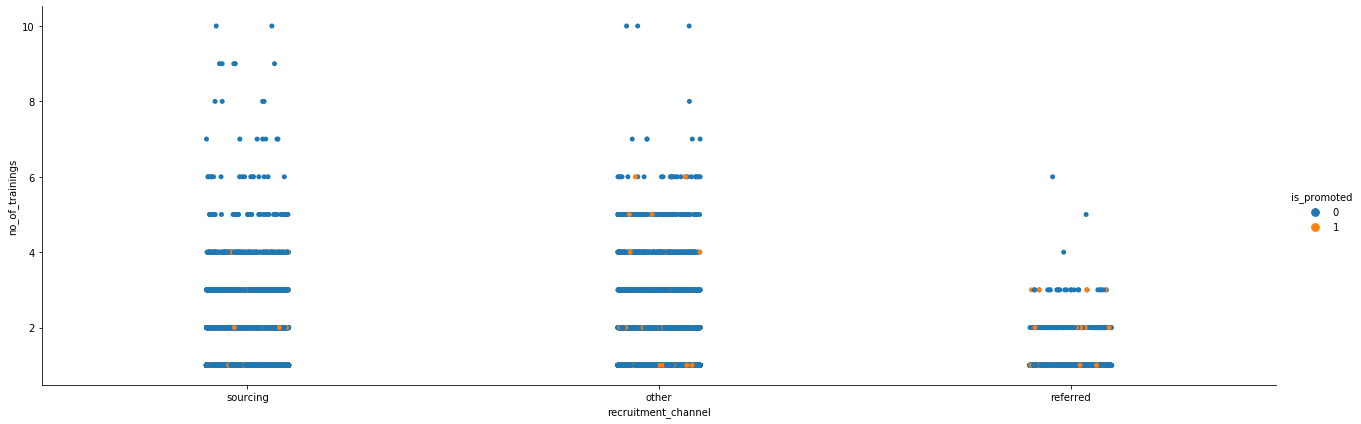

In [13]:
sns.catplot(x='recruitment_channel',y='no_of_trainings',hue='is_promoted', data=train_df,height=6, aspect=3.0)

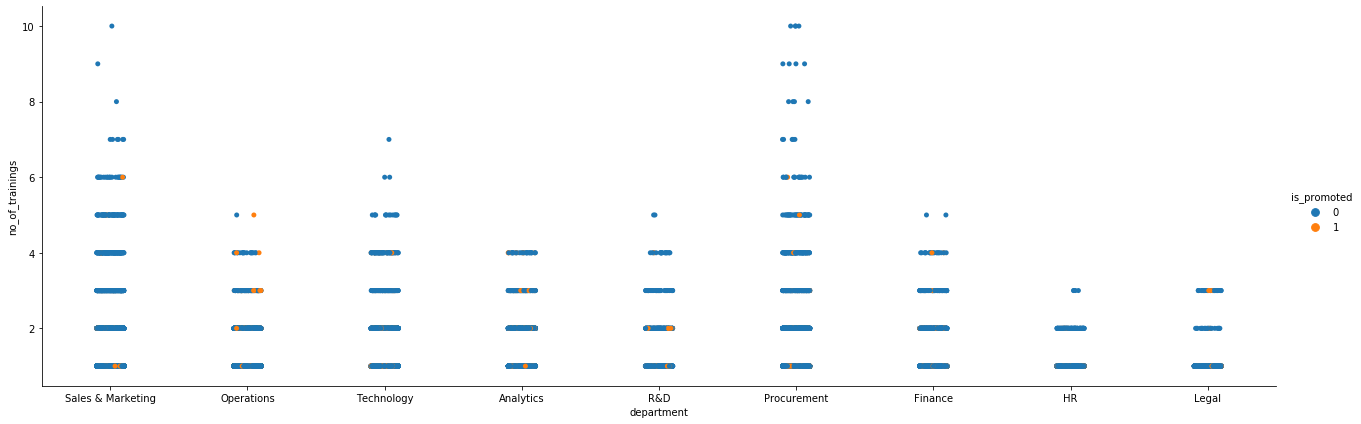

In [14]:
sns.catplot(x='department',y='no_of_trainings',hue='is_promoted', data=train_df,height=6, aspect=3.0)

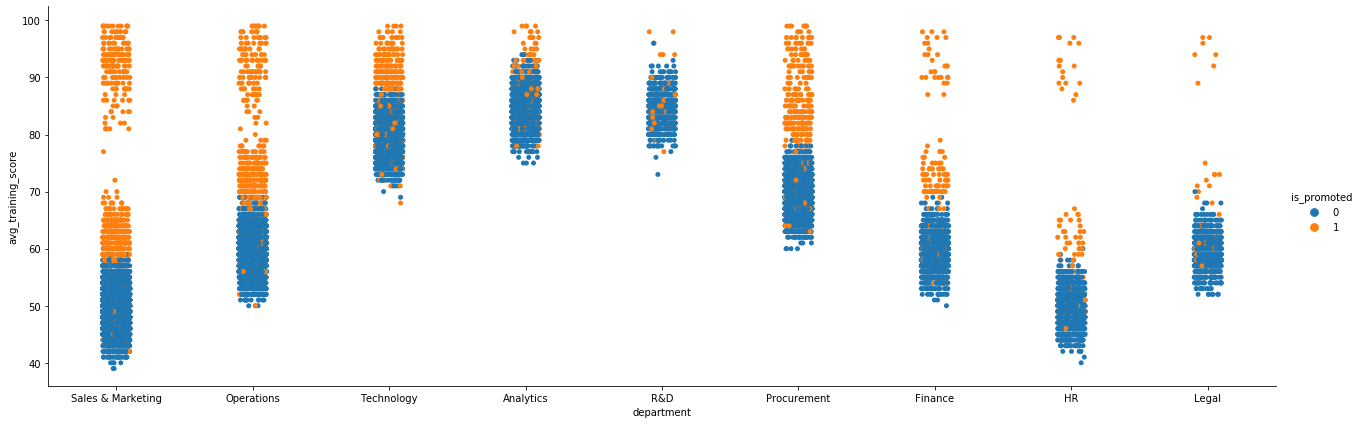

In [15]:
sns.catplot(x='department',y='avg_training_score',hue='is_promoted', data=train_df,height=6, aspect=3.0)

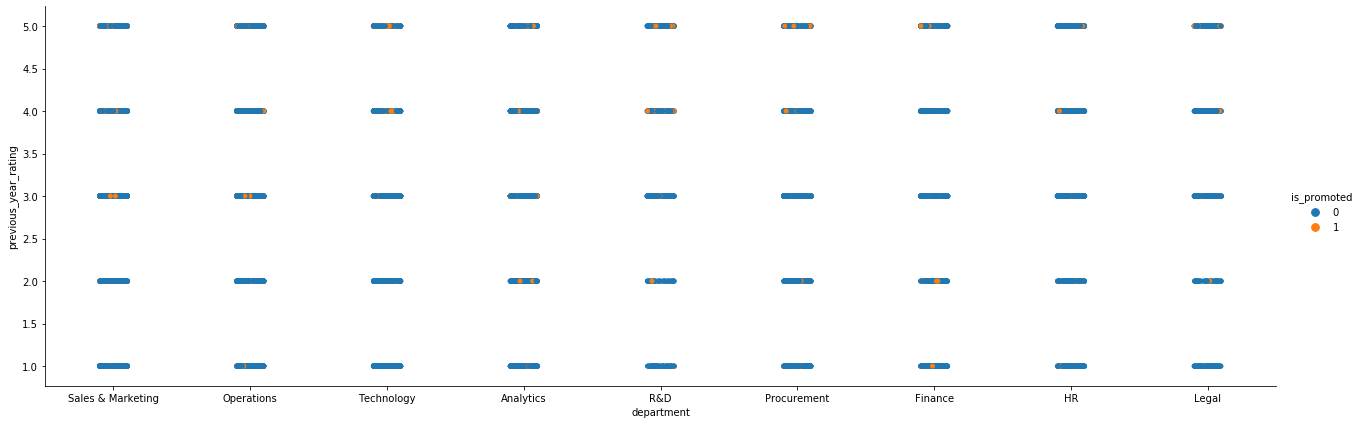

In [16]:
sns.catplot(x='department',y='previous_year_rating',hue='is_promoted', data=train_df,height=6, aspect=3.0)

1. Female employees got less no of trainings.
2. Most no of training done with bachelor's Educated employees and less no of training recieved by Below Secondary's eductaed employee.
3. referred employees got least no of trainings and Sourcing employees got more no of trainings.
4. procurement department empoyees got more no of trainings and also sales&Marketing , but HR, Finance, Analytics & Leagl recieved less no of trainigs.
5. sales&Marketing,operations &procurement got avg training scoreand also promoted more and Legal,Hr & R&d department got less no of promotions.
6. previous rating score is distributed over all department sectors

In [ ]:
##Correlation Matrix of variables

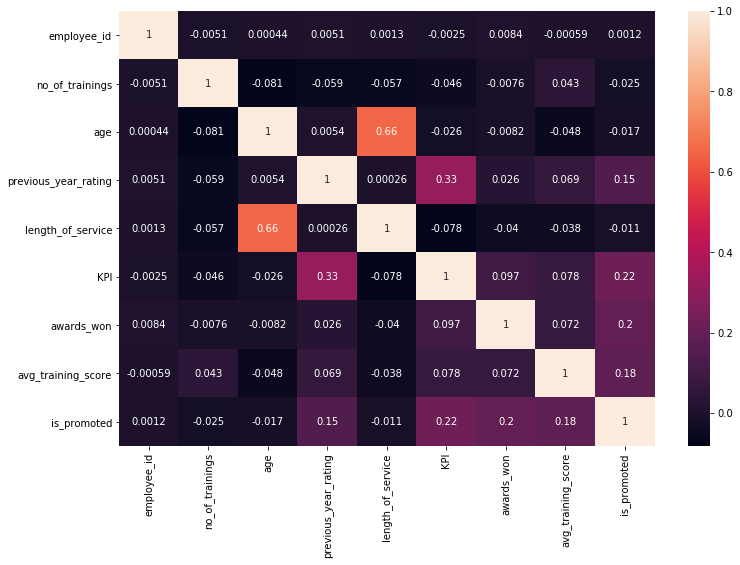

In [139]:
plt.figure(figsize=(12, 8))

hr_corr = train_df.corr()
sns.heatmap(hr_corr, 
            xticklabels = hr_corr.columns.values,
            yticklabels = hr_corr.columns.values,
            annot = True)

Statistical measurement of relationship between variables

Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

Categorical Vs Categorical--- Chi-Square test

In [ ]:
categorical_columns=['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating',
                   'age','KPIs_met >80%','awards_won?']

continuous_column=['avg_training_score']

Target=['is_promoted']

In [ ]:
## Chi square Test with target varibale and categorical variable

In [146]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    SelectedPredictors=[]
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [147]:
categorical_columns=['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating',
'age','KPI','awards_won']
FunctionChisq(inpData=train_df, TargetVariable='is_promoted',CategoricalVariablesList=categorical_columns)

department is correlated with is_promoted | P-Value: 9.882497107474489e-29
region is correlated with is_promoted | P-Value: 7.275378205784026e-80
education is correlated with is_promoted | P-Value: 3.042415798632901e-08
gender is correlated with is_promoted | P-Value: 0.009765091521176657
recruitment_channel is correlated with is_promoted | P-Value: 6.650937825577018e-05
no_of_trainings is correlated with is_promoted | P-Value: 5.64626821736642e-05
previous_year_rating is correlated with is_promoted | P-Value: 1.119991400953177e-288
age is correlated with is_promoted | P-Value: 2.264771872127578e-09
KPI is correlated with is_promoted | P-Value: 0.0
awards_won is correlated with is_promoted | P-Value: 0.0


['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'age',
 'KPI',
 'awards_won']

In [ ]:
## Annova Test with target varibale and continuous variable

In [150]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors_cont=[]
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors_cont.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors_cont)

In [151]:
continuous_column=['avg_training_score']
FunctionAnova(inpData=train_df, TargetVariable='is_promoted', ContinuousPredictorList=continuous_column)

avg_training_score is correlated with is_promoted | P-Value: 0.0


['avg_training_score']

In [152]:
GroupedData

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,,,,,,,
0,39187.520423,4.972696,15.405325,0.579697,0.703929,0.867491,1.257639,34.844037,3.273036,5.879398,0.319685,0.014180,62.647686
1,39285.092331,4.973865,15.682948,0.660026,0.685733,0.875321,1.203299,34.372965,3.932734,5.716367,0.698800,0.119751,71.325193


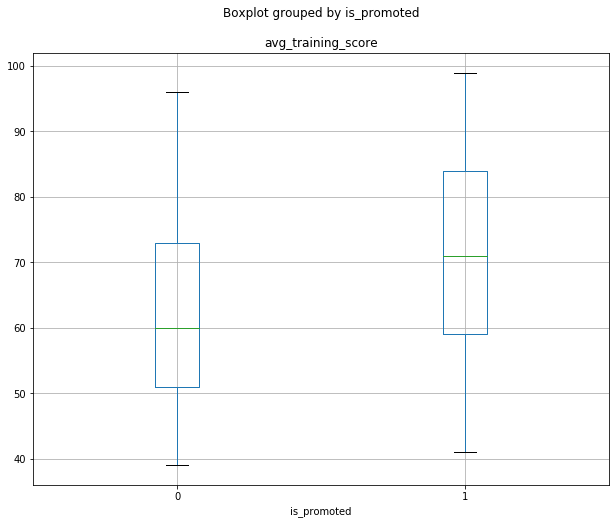

In [163]:
train_df.boxplot(column='avg_training_score', by='is_promoted', figsize=(10,8), vert=True)

in case of outlier treatmentwe can observe the mean score of each category in terms of all varibales in the dataset 
so eventhough the dataset is imbalanced ,the avg score are all close with respect to each category,
except avg_training_score but in the above visualisation boxplot no values can be observed outside the interquartile range,
hence we have to go with vanilla iteration and then had to decide on outlier treatment or business logic will suffice


Note:- Feautre selection and feautre elimination will be done at the basis of Feaure Importance at the time of Model validation
    
       For EDA purpose , to impute missing value used bfill/ffill but later at model preparation 
       will be using Miceimputer,Knnimputer,etc
    
        
       Dataset is imbalanced may be have to use smote/randomoversampler to create synthetic data
       
    
    
    
    